In [1]:
# Rama Tri Agung
# ramatriagung91@gmail.com

In [2]:
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2021-05-10 07:14:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  5.10MB/s    in 48s     

2021-05-10 07:15:19 (6.45 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [4]:
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
data_dir = os.path.join(base_dir, 'rps-cv-images')

In [5]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [6]:
data_rock_dir = os.path.join(data_dir, 'rock')
data_paper_dir = os.path.join(data_dir, 'paper')
data_scissors_dir = os.path.join(data_dir, 'scissors')

In [112]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode='nearest',
                    validation_split=0.4)

In [113]:
train_generator = datagen.flow_from_directory(
          data_dir, 
          target_size=(100, 150), 
          batch_size=32, 
          class_mode='categorical',
          subset='training' 
        )
 
validation_generator = datagen.flow_from_directory(
          data_dir,
          target_size=(100, 150),
          batch_size=32, 
          class_mode='categorical',
          subset='validation'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [114]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 8, 15, 128)      

In [115]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [116]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      self.model.stop_training = True
      print("\nTraining berhenti")

callbacks = myCallback()

In [117]:
result = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=20,
      validation_data=validation_generator,
      validation_steps=len(validation_generator),
      verbose=1,
      callbacks=[callbacks]
)

Epoch 1/20
42/42 [==============================] - 56s 1s/step - loss: 1.1722 - accuracy: 0.3318 - val_loss: 0.9715 - val_accuracy: 0.3627
Epoch 2/20
42/42 [==============================] - 55s 1s/step - loss: 0.7671 - accuracy: 0.6505 - val_loss: 0.3978 - val_accuracy: 0.8364
Epoch 3/20
42/42 [==============================] - 55s 1s/step - loss: 0.3355 - accuracy: 0.8656 - val_loss: 0.2360 - val_accuracy: 0.9222
Epoch 4/20
42/42 [==============================] - 55s 1s/step - loss: 0.2735 - accuracy: 0.8992 - val_loss: 0.3104 - val_accuracy: 0.8890
Epoch 5/20
42/42 [==============================] - 54s 1s/step - loss: 0.3011 - accuracy: 0.8982 - val_loss: 0.1954 - val_accuracy: 0.9314
Epoch 6/20
42/42 [==============================] - 54s 1s/step - loss: 0.2510 - accuracy: 0.9088 - val_loss: 0.1534 - val_accuracy: 0.9451
Epoch 7/20
42/42 [==============================] - 54s 1s/step - loss: 0.1957 - accuracy: 0.9420 - val_loss: 0.3686 - val_accuracy: 0.8673
Epoch 8/20
42/42 [==

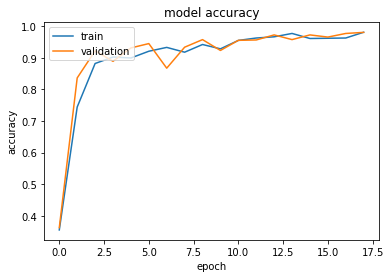

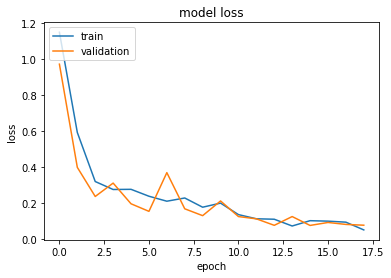

In [119]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving 5nKDkVzIMQWmtReM.png to 5nKDkVzIMQWmtReM.png
5nKDkVzIMQWmtReM.png
[[2.7812159e-05 9.9997211e-01 1.3170914e-07]]
Rock


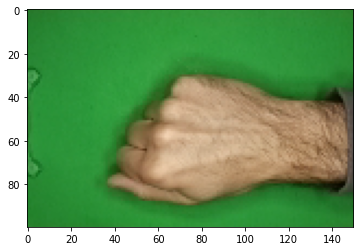

In [120]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  
  print(fn)
  print(classes)
  if classes[0][0]==np.amax(classes[0]):
    print('Paper')
  elif classes[0][1]==np.amax(classes[0]):
    print('Rock')
  elif classes[0][2]==np.amax(classes[0]):
    print('Scissors')